---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

- Estudiante: **Raul Fuentes Duque**
- Carné: **B52812**
- Estudiante: **Daniela Oporta Abarca**
- Carné: **B55160**
- Estudiante: **Estefany Barboza Salazar**
- Carné: **B50853**
- Grupo: **1**


# `P5` - *Procesos M/M/s*

> El caso especial de los procesos aleatorios donde existen "estados" y "transiciones" entre estos estados, las cadenas de Markov modelan las probabilidades de transición y el tiempo de permanencia entre cada estado. En particular, la teoría de colas describe la evolución del número de elementos en la fila, dado un flujo de entrada y un flujo de salida.

---

---
## 2. - Asignaciones

Es menester tomar una decisión con respecto al número de "servidores" necesarios para cierto proceso de vacunación, de forma tal que el sistema no exceda 50 personas en fila durante el 95% del tiempo de servicio. 

En un estudio de afluencia y del tiempo de servicio se asumen y determinan los siguientes parámetros:

- La tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 4$ personas por minuto.

- La tasa de servicio $\nu$ de cada "servidor" (es decir, personal de salud tomando datos y vacunando) es constante durante ocho horas de funcionamiento y tiene un valor de $\nu = 0.25$ personas por minuto.

Entonces,

- (40%) Hacer la determinación teórica del número $s$ de servidores necesarios para cumplir el requisito.
- (60%) Modificar el código provisto para simular y corroborar el resultado anterior y crear al menos dos gráficas que muestren esta simulación.

#### Sobre la presentación

El trabajo debe entregarse como un *notebook* de Jupyter nuevo (sin incluir información de este enunciado), en la forma de reporte. La primera parte de las asignaciones debe ser desarrollada por completo y en orden, editando las ecuaciones en $\LaTeX$. La segunda parte debe incluir el código desarrollado y sus resultados. Esto es enviado vía Mediación Virtual, uno por grupo.

---
### Parte 1
#### Hacer la determinación teórica del número  𝑠  de servidores necesarios para cumplir el requisito.

Primero, se debe analizar un caso por encima del valor deseado, que logre exceder las 50 personas en la fila, por lo que se elige 51 personas, por comodidad.
$$ 
  P(exceso) = \sum_{i=51}^{\infty} (1 - \rho)\rho^{i}
$$
Se aplican propiedades de la sumatoria para que quede de la siguiente manera:

$$
    P(51 \; o \; más \; clientes) = 1 - \sum_{i=0}^{50} (1 - \rho)\rho^{i} = \rho^{51}  (1)
   \label{eq1}
$$

Sabiendo que se puede sustituir la expresión  $\rho = \frac{\lambda}{sv} $, se obtiene lo siguiente:

$$
 P(51 \; o \; más \; clientes) = \left({\frac{\lambda}{sv}}\right)^{51}
$$

Sabiendo lo anterior, se puede deducir que al 95% del tiempo va a estar dentro del límite, por lo que para calcular la cantidad de servidores, se debe analizar el 5% que excede el límite requerido.

$$
 P(51 \; o \; mas \; clientes) = \left(\frac{\lambda}{sv}\right)^{51} \leq 0.05
$$

Por lo tanto para averiguar s (cantidad de servidores) se debe resolver la siguiente inecuación:

$$
\left(\frac{\lambda}{sv}\right)^{51} \leq 0.05
$$

Sabiendo que se tienen los valores $\lambda = 4$ y $ v = 0.25$, se despeja de la siguiente manera:

$$
\frac{1}{s^{51}}\left(\frac{\lambda}{v}\right)^{51} \leq 0.05
$$

$$
\frac{1}{s^{51}}\left(\frac{4}{0.25}\right)^{51} \leq 0.05
$$

$$
\frac{1}{0.05}\left(\frac{4}{0.25}\right)^{51} \leq s^{51}
$$

Aplicando raíz de 51 a ambos lados:

$$
\sqrt[51]{\frac{1}{0.05}\left(\frac{4}{0.25}\right)^{51}} \leq \sqrt[51]{s^{51}}
$$

$$
\frac{4}{0.25}\frac{1}{\sqrt[51]{0.05^{51}}} \leq s
$$

$$
16.96\leq s
$$

Por lo tanto se necesita una cantodad de servidores mayor a 16.96, por lo que se tomará por comodidad 17 servidores.

### Parte 2
Modificar el código provisto para simular y corroborar el resultado anterior y crear al menos dos gráficas que muestren esta simulación.

Parámetro servidores =  17
Parámetro lambda = 4.0
Parámetro nu = 0.25
Tiempo con más de 48 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 4.32 horas.


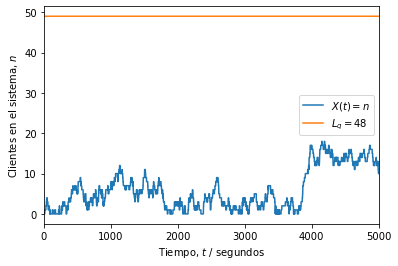

In [5]:

#Primera prueba con los valores de servidores obtenidos en la parte 1

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


#Número de servidores
servidores = 17 

#Número de clientes
N = 1000

# Parámetro de llegada (clientes/segundos)
lam = 4/60

# Parámetro de servicio (servicios/segundos) 
nu = 0.25/60

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
# en este caso es por cada servidor, por lo tanto servidores x nu
Y = stats.expon(scale = 1/(servidores*nu)) 

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 50

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
            exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Parámetro servidores = ', str(servidores))
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()

Parámetro servidores =  15
Parámetro lambda = 4.0
Parámetro nu = 0.25
Tiempo con más de 48 solicitudes en fila:
	 26.03%
	 No cumple con la especificación.
Simulación es equivalente a 4.73 horas.


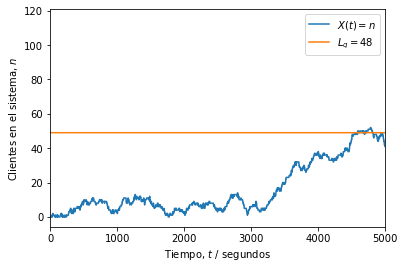

In [18]:

#   Segunda prueba con los valores de servidores obtenidos en la parte 1.
#   En esta prueba se reducen la cantidad de servidores a 15, menos de lo calculado, para demostrar que bajo estas
# condiciones no se cumplen las especidicaciones.

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


#Número de servidores
servidores = 15

#Número de clientes
N = 1000

# Parámetro de llegada (clientes/segundos)
lam = 4/60

# Parámetro de servicio (servicios/segundos) 
nu = 0.25/60

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
# en este caso es por cada servidor, por lo tanto servidores x nu
Y = stats.expon(scale = 1/(servidores*nu)) 

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 50

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
            exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Parámetro servidores = ', str(servidores))
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---